some prereading: 

[Approaching (Almost) Any Machine Learning Problem](http://blog.kaggle.com/2016/07/21/approaching-almost-any-machine-learning-problem-abhishek-thakur/)


# Step 1 - get data

In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# https://stackoverflow.com/a/50970152
pd.core.common.is_list_like = pd.api.types.is_list_like
# you have to install pandas_datareader module i Anaconda Navigator:
# http://docs.anaconda.com/anaconda/navigator/tutorials/manage-packages/
from pandas_datareader.data import DataReader

In [2]:
# Define timeframe of stocks we retreive 
end = dt.datetime.now() 
start = end - dt.timedelta(days=5*365)

In [3]:
# Use DataReader to get Apples stock data from IEX https://iextrading.com/developer/
# df = DataReader('AAPL','iex', start, end)
df = DataReader('MU','iex', start, end)
df.head()

5y


,open,high,low,close,volume
date,,,,,
2013-10-11,17.89,18.005,16.56,16.840,153906087
2013-10-14,16.57,17.150,16.17,17.070,62909462
2013-10-15,17.08,17.430,16.84,16.920,63043897
2013-10-16,17.08,17.300,16.91,16.960,49096355
2013-10-17,17.00,17.160,16.74,17.145,40714771


In [4]:
df.tail()

,open,high,low,close,volume
date,,,,,
2018-10-03,46.28,46.415,44.7148,45.15,29505110
2018-10-04,44.50,44.750,43.5100,44.16,34579572
2018-10-05,44.08,44.630,42.8100,43.58,35367076
2018-10-08,43.28,43.850,42.6100,43.07,27426552
2018-10-09,42.81,43.040,41.9800,42.27,31576374


In [5]:
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')

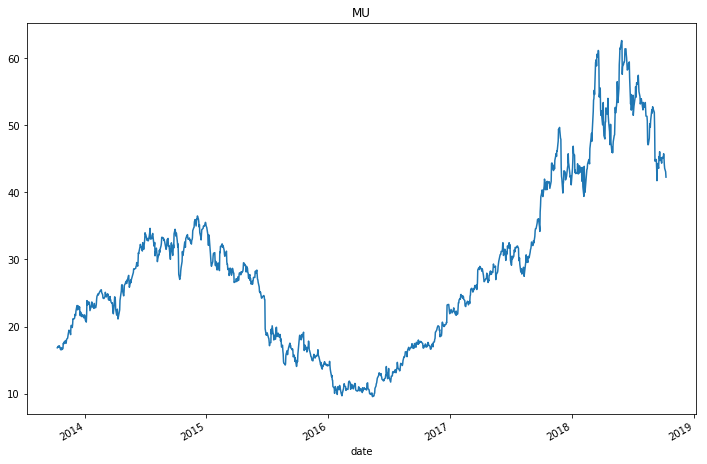

In [6]:
df.close.plot(figsize=(12,8), title='MU')

# Step 2 - implement 2 features and visualize the price and the features in the same graph

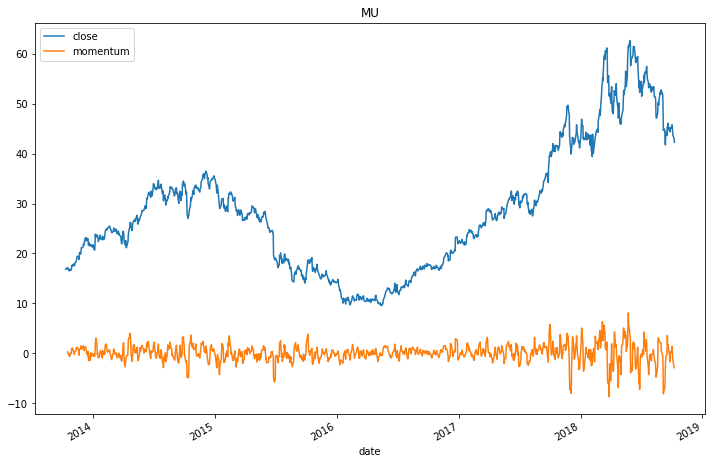

In [7]:
# https://www.investopedia.com/articles/technical/081501.asp

#Feature 1
df['momentum'] = df.close - df.close.shift(4)
df[['close', 'momentum']].plot(figsize=(12,8), title='MU')

In [8]:
#Feature 2
df["ROC_3"] = df.close / df.close.shift(3) * 100

In [9]:
df.head(10)

,open,high,low,close,volume,momentum,ROC_3
date,,,,,,,
2013-10-11,17.89,18.005,16.56,16.840,153906087,NaN,NaN
2013-10-14,16.57,17.150,16.17,17.070,62909462,NaN,NaN
2013-10-15,17.08,17.430,16.84,16.920,63043897,NaN,NaN
2013-10-16,17.08,17.300,16.91,16.960,49096355,NaN,100.712589
2013-10-17,17.00,17.160,16.74,17.145,40714771,0.305,100.439367
2013-10-18,17.17,17.250,16.96,17.029,34970601,-0.041,100.644208
2013-10-21,17.03,17.140,16.51,16.565,44886230,-0.355,97.670991
2013-10-22,16.70,16.940,16.40,16.760,48362787,-0.200,97.754447
2013-10-23,16.49,16.590,16.35,16.551,39252098,-0.594,97.193024


# Step 3 - do a regression based on the features, forecast 1-day ahead

In [10]:
df['Label'] = df["close"].shift(-1)

In [11]:
df.head()

,open,high,low,close,volume,momentum,ROC_3,Label
date,,,,,,,,
2013-10-11,17.89,18.005,16.56,16.840,153906087,NaN,NaN,17.070
2013-10-14,16.57,17.150,16.17,17.070,62909462,NaN,NaN,16.920
2013-10-15,17.08,17.430,16.84,16.920,63043897,NaN,NaN,16.960
2013-10-16,17.08,17.300,16.91,16.960,49096355,NaN,100.712589,17.145
2013-10-17,17.00,17.160,16.74,17.145,40714771,0.305,100.439367,17.029


In [12]:
df.dropna(inplace=True)

In [13]:
df.head()

,open,high,low,close,volume,momentum,ROC_3,Label
date,,,,,,,,
2013-10-17,17.00,17.16,16.74,17.145,40714771,0.305,100.439367,17.029
2013-10-18,17.17,17.25,16.96,17.029,34970601,-0.041,100.644208,16.565
2013-10-21,17.03,17.14,16.51,16.565,44886230,-0.355,97.670991,16.760
2013-10-22,16.70,16.94,16.40,16.760,48362787,-0.200,97.754447,16.551
2013-10-23,16.49,16.59,16.35,16.551,39252098,-0.594,97.193024,16.830


In [14]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, ElasticNet, ridge
from sklearn.neural_network import MLPClassifier

In [15]:
X = np.array(df.drop(['Label', 'volume', 'low', 'high', 'open'], 1))

In [16]:
X

array([[ 1.71450000e+01,  3.05000000e-01,  1.00439367e+02],
       [ 1.70290000e+01, -4.10000000e-02,  1.00644208e+02],
       [ 1.65650000e+01, -3.55000000e-01,  9.76709906e+01],
       ...,
       [ 4.41600000e+01, -1.07000000e+00,  9.78073090e+01],
       [ 4.35800000e+01, -1.57000000e+00,  9.52360140e+01],
       [ 4.30700000e+01, -2.69000000e+00,  9.53931340e+01]])

In [17]:
y = np.array(df['Label'])

In [18]:
y

array([17.029, 16.565, 16.76 , ..., 43.58 , 43.07 , 42.27 ])

In [19]:
y = y.reshape(-1,1)

In [20]:
y

array([[17.029],
       [16.565],
       [16.76 ],
       ...,
       [43.58 ],
       [43.07 ],
       [42.27 ]])

In [21]:
scaler = preprocessing.StandardScaler().fit(y)

In [22]:
X = scaler.transform(X)
y = scaler.transform(y)

In [23]:
X

array([[-0.88225569, -2.21040015,  5.68704078],
       [-0.89140443, -2.23768863,  5.70319625],
       [-0.92799938, -2.26245332,  5.46870323],
       ...,
       [ 1.24837511, -2.31884425,  5.47945445],
       [ 1.20263141, -2.35827847,  5.27666044],
       [ 1.16240851, -2.44661112,  5.28905225]])

In [24]:
y

array([[-0.89140443],
       [-0.92799938],
       [-0.91262004],
       ...,
       [ 1.20263141],
       [ 1.16240851],
       [ 1.09931376]])

In [25]:
from sklearn.model_selection import TimeSeriesSplit

In [26]:
tscv = TimeSeriesSplit(n_splits=5)

In [27]:
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [28]:
X_train

array([[-0.88225569, -2.21040015,  5.68704078],
       [-0.89140443, -2.23768863,  5.70319625],
       [-0.92799938, -2.26245332,  5.46870323],
       ...,
       [ 1.04489454, -2.29833846,  5.57537961],
       [ 1.17266141, -2.13902422,  6.3046839 ],
       [ 1.17345009, -1.9734005 ,  6.03515215]])

In [29]:
linear = LinearRegression()

In [30]:
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
linear.score(X_test, y_test)

0.9380260430816013

In [32]:
#Single prediction
linear.predict(np.array([[16.565, -0.355, 97.670991]]))

array([[16.52507543]])

In [33]:
X_test[: 5]

array([[ 1.1576764 , -2.09249184,  5.92362922],
       [ 1.0669777 , -2.21237186,  5.40775036],
       [ 1.08196271, -2.32515372,  5.44066122],
       [ 1.09694771, -2.31095741,  5.51119188],
       [ 1.10956666, -2.28256477,  5.75412998]])

In [34]:
forecast_set = linear.predict(X_test)

In [35]:
#First 5 predictions
forecast_set[: 5]

array([[1.16021273],
       [1.06796704],
       [1.08108444],
       [1.09624279],
       [1.10916326]])

In [36]:
#Actual values
y_test[: 5]

array([[1.0669777 ],
       [1.08196271],
       [1.09694771],
       [1.10956666],
       [1.21288431]])

In [37]:
y_test_inv = scaler.inverse_transform(y_test)
forecast_set_inv = scaler.inverse_transform(forecast_set)

In [38]:
#First 10 predicted prices
forecast_set_inv[: 10]

array([[43.04215895],
       [41.8725441 ],
       [42.03886413],
       [42.2310621 ],
       [42.39488517],
       [43.74198537],
       [44.01292014],
       [45.80458885],
       [44.45547488],
       [44.13039127]])

In [39]:
#First 10 actual prices
y_test_inv[: 10]

array([[41.86],
       [42.05],
       [42.24],
       [42.4 ],
       [43.71],
       [43.98],
       [45.75],
       [44.42],
       [44.12],
       [42.25]])

# Step 4 - plot (as a line) the regression and expected output, make the plot zoomable

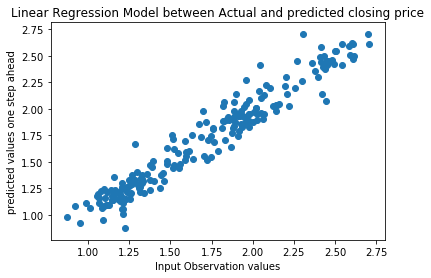

In [40]:
#scatter plot of observed and predicted values
import matplotlib.pyplot as plt
plt.scatter(y_test,forecast_set)
plt.xlabel("Input Observation values")
plt.ylabel("predicted values one step ahead")
plt.title("Linear Regression Model between Actual and predicted closing price")
plt.show()
#There is a increasing linear regression between them.

C:\Users\jnandikonda\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


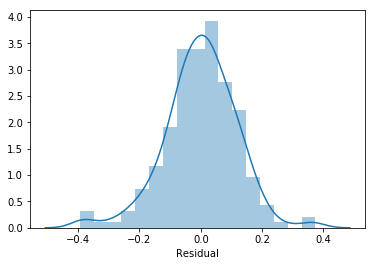

In [41]:
# Histogram of residuals show they are normally distributed
import seaborn as sns
sns.distplot((y_test-forecast_set),axlabel = 'Residual')

In [42]:
#resetting the index
df.reset_index(inplace=True)

In [43]:
# Visualizing Actual(Close price) and Predicted(+1 day forecast) price

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.plotly as py
import plotly.graph_objs as go




trace1 = go.Scatter(x=df.date,y=y_test_inv,name = 'observed close price')
trace2 = go.Scatter(x=df.date,y=forecast_set_inv,name = 'predicted price')
data = [trace1,trace2]
layout = go.Layout(title="Actual Vs predicted close price", xaxis={'title':'Date'}, yaxis={'title':'Prices'})
figure = go.Figure(data=data,layout=layout)
py.iplot(figure,filename ="Actual Vs predicted close price")

# Step 5 - add 2 more features from the “Type 2” category of features presented in the paper

In [44]:
#Feature 1 from type 2 category OBV
df["OBV"] = (df['volume'] * (-df['close'].diff().le(0)*2- 1)).cumsum()

In [45]:
#Feature 2 from type 2 category MA5
df["moving_average5"] = df["close"].rolling(5).mean()

In [46]:
df.head()

,date,open,high,low,close,volume,momentum,ROC_3,Label,OBV,moving_average5
0,2013-10-17,17.00,17.16,16.74,17.145,40714771,0.305,100.439367,17.029,40714771,NaN
1,2013-10-18,17.17,17.25,16.96,17.029,34970601,-0.041,100.644208,16.565,5744170,NaN
2,2013-10-21,17.03,17.14,16.51,16.565,44886230,-0.355,97.670991,16.760,-39142060,NaN
3,2013-10-22,16.70,16.94,16.40,16.760,48362787,-0.200,97.754447,16.551,9220727,NaN
4,2013-10-23,16.49,16.59,16.35,16.551,39252098,-0.594,97.193024,16.830,-30031371,16.81


In [47]:
df.head()

,date,open,high,low,close,volume,momentum,ROC_3,Label,OBV,moving_average5
0,2013-10-17,17.00,17.16,16.74,17.145,40714771,0.305,100.439367,17.029,40714771,NaN
1,2013-10-18,17.17,17.25,16.96,17.029,34970601,-0.041,100.644208,16.565,5744170,NaN
2,2013-10-21,17.03,17.14,16.51,16.565,44886230,-0.355,97.670991,16.760,-39142060,NaN
3,2013-10-22,16.70,16.94,16.40,16.760,48362787,-0.200,97.754447,16.551,9220727,NaN
4,2013-10-23,16.49,16.59,16.35,16.551,39252098,-0.594,97.193024,16.830,-30031371,16.81


In [48]:
df.dropna(inplace=True)

In [49]:
df.head()

,date,open,high,low,close,volume,momentum,ROC_3,Label,OBV,moving_average5
4,2013-10-23,16.49,16.59,16.35,16.551,39252098,-0.594,97.193024,16.830,-30031371,16.8100
5,2013-10-24,16.43,16.92,16.40,16.830,30291279,-0.199,101.599759,16.580,259908,16.7470
6,2013-10-25,16.92,16.99,16.52,16.580,28678346,0.015,98.926014,16.720,-28418438,16.6572
7,2013-10-28,16.52,16.75,16.30,16.720,19926898,-0.040,101.021086,17.495,-8491540,16.6882
8,2013-10-29,17.02,17.50,16.93,17.495,51381371,0.944,103.951277,17.390,42889831,16.8352


In [50]:
M = np.array(df.drop(['date', 'open', 'high','low','volume', 'Label'], 1))

In [51]:
M

array([[ 1.65510000e+01, -5.94000000e-01,  9.71930237e+01,
        -3.00313710e+07,  1.68100000e+01],
       [ 1.68300000e+01, -1.99000000e-01,  1.01599759e+02,
         2.59908000e+05,  1.67470000e+01],
       [ 1.65800000e+01,  1.50000000e-02,  9.89260143e+01,
        -2.84184380e+07,  1.66572000e+01],
       ...,
       [ 4.41600000e+01, -1.07000000e+00,  9.78073090e+01,
         1.24792529e+09,  4.50900000e+01],
       [ 4.35800000e+01, -1.57000000e+00,  9.52360140e+01,
         1.21255821e+09,  4.47600000e+01],
       [ 4.30700000e+01, -2.69000000e+00,  9.53931340e+01,
         1.18513166e+09,  4.43440000e+01]])

In [52]:
n = np.array(df['Label'])

In [53]:
n

array([16.83, 16.58, 16.72, ..., 43.58, 43.07, 42.27])

In [54]:
n = n.reshape(-1,1)

In [55]:
n

array([[16.83],
       [16.58],
       [16.72],
       ...,
       [43.58],
       [43.07],
       [42.27]])

In [56]:
scaler2 = preprocessing.StandardScaler().fit(n)

In [57]:
M = scaler2.transform(M)

In [58]:
n = scaler2.transform(n)

In [59]:
M

array([[-9.31797067e-01, -2.28365151e+00,  5.42669102e+00,
        -2.36792539e+06, -9.11375352e-01],
       [-9.09798385e-01, -2.25250643e+00,  5.77415466e+00,
         2.04910723e+04, -9.16342796e-01],
       [-9.29510465e-01, -2.23563289e+00,  5.56333442e+00,
        -2.24074833e+06, -9.23423375e-01],
       ...,
       [ 1.24512620e+00, -2.32118331e+00,  5.47512638e+00,
         9.83968102e+07,  1.31845514e+00],
       [ 1.19939417e+00, -2.36060747e+00,  5.27238409e+00,
         9.56081757e+07,  1.29243519e+00],
       [ 1.15918153e+00, -2.44891759e+00,  5.28477274e+00,
         9.34456381e+07,  1.25963429e+00]])

In [60]:
n

array([[-0.90979839],
       [-0.92951047],
       [-0.9184717 ],
       ...,
       [ 1.19939417],
       [ 1.15918153],
       [ 1.09610288]])

In [61]:
from sklearn.model_selection import TimeSeriesSplit

In [62]:
tscv = TimeSeriesSplit(n_splits=5)

In [63]:
for train_index, test_index in tscv.split(M):
    M_train, M_test = M[train_index], M[test_index]
    n_train, n_test = n[train_index], n[test_index]

In [64]:
len(M_train)

1041

In [65]:
len(n_train)

1041

In [66]:
linear2 = LinearRegression()

In [67]:
linear2.fit(M_train,n_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
linear2.score(M_test, n_test)

0.9371102897877015

In [69]:
#Single prediction
linear2.predict(np.array([[16.720, -0.040, 101.021086, -8491540, 16.6882]]))

array([[15.36130299]])

# Step 6 - design a decision for when to invest and when to sell based on your regression. 
## The model can be naïve, meaning you can create a rule (if .. X .. then .. Y)

In [70]:
pred = linear2.predict(np.array([[16.720, -0.040, 101.021086, -8491540, 16.6882]]))
actual = 17.495

In [71]:
pred

array([[15.36130299]])

In [72]:
print(pred[0])

[15.36130299]


In [73]:
if pred[0] < actual:
    print("invest")
else:
    print("sell")
   

invest
